### 1.机器学习模型概述

- 模型与算法
<br>模型：一类问题的解题步骤，即一类问题的算法。
<br>算法：能够解决特定问题的无歧义、机械、有效的运算流程和规则。

- 机器学习中的三要素
<br>模型、策略与算法
<br>模型：回归模型、分类模型
<br>算法：有了模型和策略之后的优化算法：梯度下降法、牛顿法

- 机器学习模型
<br>传统机器学习模型（单模型）
<br>集成(ensemble)与提升（boosting）模型
<br>神经网络与深度学习

### 2.传统机器学习模型（单模型）

- 按任务类型划分
 - 分类
   - 逻辑回归
   - 决策树
   - 朴素贝叶斯
   - knn
   - 感知机与神经网络
   - 支持向量机
   - ...
   
 - 回归
   - 线性回归
   - lasso
   - ridge
   - ...

- 按性质划分
  - 非概率模型（决策函数）
      - 回归模型
      - ...
    
  - 概率模型
      - 决策树
      - 朴素贝叶斯
      - ...

- 按知识体系划分
  - 线性模型
      - 线性回归
      - 逻辑回归
      - 线性可分支持向量机
      - ...
    
  - 神经网络模型
      - 逻辑回归
      - 感知机
      - 神经网络
      - 深度学习
      
  - 支持向量机模型
      - 感知机
      - svm
      - tsvm
      - ...
      
  - 贝叶斯模型
      - 朴素贝叶斯
      - 贝叶斯网络
      - 高斯过程
      - 贝叶斯机器学习
      - ...
      
  - 树模型
      - 决策树
      - CART
      - Adaboost(集成模型)
      - GBDT(集成模型)
      - ...

### 3.集成与提升模型（boosting）

- 集成学习（ensemble learning）
<br>构建并结合多个学习器来完成学习任务。
<br>集成学习的关键在于构建“好而不同”的基学习器。

- boosting
<br> boosting族算法：将一组弱学习器提升为强学习器的框架算法。
   - Adaboost
   - GBDT
   - XGBoost
   - lightGBM
   - ...

- bagging
    - 随机森林

### 4.sklearn

官网文档：http://sklearn.apachecn.org/cn/0.19.0/

![sklearn](./图1_sklearn.png)

- 预处理
- 降维
- 分类
- 回归
- 聚类
- 模型评估与选择
- ...

### 5.机器学习调参

- 机器学习模型的参数有哪些？
   - 模型训练参数：机器学习需要学习的东西，由训练得出，无需也无法调整
      - 神经网络的权重与偏置
      - 线性回归的变量系数
      - ...
   - 模型配置参数
      - 优化算法的学习率
      - 训练轮数
      - 树模型最大深度
      - ...

- 机器学习模型参数调整方法
    - 手动根据经验和尝试调整
    - 网格搜索（Grid Search)
    - 贝叶斯调参

![lightgbm调参](./图2_lightgbm调参.png)

### 6. GBDT/XGBoost/lightGBM

GBDT：梯度提升决策树，XGBoost和lightGBM也属于广义上的GBDT模型
<br>GBDT属于加性模型，构建很多棵CART（分类回归树）并组合

MSE: 6.5235


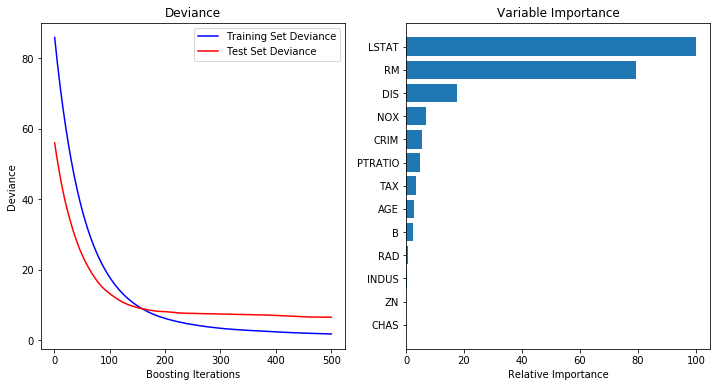

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# 导入数据
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# 拟合模型
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# 绘制训练误差图

# 计算测试误差
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# 绘制特征重要性图
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show();

In [3]:
### XGBoost
import xgboost as xgb

data = np.random.rand(100000, 10) 
label = np.random.randint(2, size=100000) 
dtrain = xgb.DMatrix(data, label=label, missing = -999.0)

data2 = np.random.rand(5000, 10)
label2 = np.random.randint(2, size=5000)
dtest = xgb.DMatrix(data2, label=label2, missing = -999.0)

params = {'bst:max_depth':2, 'bst:eta':1, 'silent':1, 'objective':'binary:logistic' }
params['nthread'] = 4
params['eval_metric'] = 'auc'

evallist  = [(dtrain,'train'), (dtest,'eval')]

num_round = 50
bst = xgb.train(params, dtrain, num_round, evallist)

[0]	train-auc:0.516559	eval-auc:0.504431
[1]	train-auc:0.533352	eval-auc:0.503047
[2]	train-auc:0.538125	eval-auc:0.501438
[3]	train-auc:0.540517	eval-auc:0.502379
[4]	train-auc:0.544021	eval-auc:0.49953
[5]	train-auc:0.546739	eval-auc:0.49975
[6]	train-auc:0.551248	eval-auc:0.498894
[7]	train-auc:0.557777	eval-auc:0.496043
[8]	train-auc:0.560104	eval-auc:0.495231
[9]	train-auc:0.561934	eval-auc:0.49411
[10]	train-auc:0.562128	eval-auc:0.495561
[11]	train-auc:0.566582	eval-auc:0.496794
[12]	train-auc:0.572806	eval-auc:0.496856
[13]	train-auc:0.574817	eval-auc:0.498392
[14]	train-auc:0.578393	eval-auc:0.501446
[15]	train-auc:0.581842	eval-auc:0.502795
[16]	train-auc:0.58251	eval-auc:0.503
[17]	train-auc:0.584241	eval-auc:0.502965
[18]	train-auc:0.586867	eval-auc:0.503516
[19]	train-auc:0.587748	eval-auc:0.502868
[20]	train-auc:0.588055	eval-auc:0.503148
[21]	train-auc:0.588948	eval-auc:0.503913
[22]	train-auc:0.589735	eval-auc:0.504179
[23]	train-auc:0.593615	eval-auc:0.50847
[24]	train

In [4]:
bst = xgb.train(params, dtrain, num_round, evallist, early_stopping_rounds=10)

[0]	train-auc:0.516559	eval-auc:0.504431
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.533352	eval-auc:0.503047
[2]	train-auc:0.538125	eval-auc:0.501438
[3]	train-auc:0.540517	eval-auc:0.502379
[4]	train-auc:0.544021	eval-auc:0.49953
[5]	train-auc:0.546739	eval-auc:0.49975
[6]	train-auc:0.551248	eval-auc:0.498894
[7]	train-auc:0.557777	eval-auc:0.496043
[8]	train-auc:0.560104	eval-auc:0.495231
[9]	train-auc:0.561934	eval-auc:0.49411
[10]	train-auc:0.562128	eval-auc:0.495561
Stopping. Best iteration:
[0]	train-auc:0.516559	eval-auc:0.504431



In [6]:
### lightGBM
import lightgbm as lgb

data = np.random.rand(100000, 10)
label = np.random.randint(2, size=100000)
train_data = lgb.Dataset(data, label=label)

data2 = np.random.rand(5000, 10)
label2 = np.random.randint(2, size=5000)
test_data = lgb.Dataset(data2, label=label2)

param = {'num_leaves':31, 'num_trees':100, 'objective':'binary', 'metrics': 'binary_error'}
num_round = 10
bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])

D:\Anaconda\anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's binary_error: 0.4974
[2]	valid_0's binary_error: 0.4972
[3]	valid_0's binary_error: 0.5014
[4]	valid_0's binary_error: 0.5016
[5]	valid_0's binary_error: 0.5002
[6]	valid_0's binary_error: 0.4934
[7]	valid_0's binary_error: 0.4964
[8]	valid_0's binary_error: 0.4964
[9]	valid_0's binary_error: 0.501
[10]	valid_0's binary_error: 0.5016
[11]	valid_0's binary_error: 0.5006
[12]	valid_0's binary_error: 0.5022
[13]	valid_0's binary_error: 0.5022
[14]	valid_0's binary_error: 0.5022
[15]	valid_0's binary_error: 0.5028
[16]	valid_0's binary_error: 0.5034
[17]	valid_0's binary_error: 0.501
[18]	valid_0's binary_error: 0.5
[19]	valid_0's binary_error: 0.5012
[20]	valid_0's binary_error: 0.5018
[21]	valid_0's binary_error: 0.5022
[22]	valid_0's binary_error: 0.5026
[23]	valid_0's binary_error: 0.5004
[24]	valid_0's binary_error: 0.5042
[25]	valid_0's binary_error: 0.5038
[26]	valid_0's binary_error: 0.5036
[27]	valid_0's binary_error: 0.506
[28]	valid_0's binary_error: 0.5064
[29]	va

In [7]:
num_round = 10
param = {'num_leaves':50, 'num_trees':100, 'objective':'binary'}
lgb.cv(param, train_data, num_round, nfold=5)

D:\Anaconda\anaconda\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


{'binary_logloss-mean': [0.6931401375457906,
  0.6931517785613863,
  0.6931208653658055,
  0.6931689875576066,
  0.6931887342077084,
  0.6932066223794984,
  0.6931914385270763,
  0.6931900491251015,
  0.6932110655600082,
  0.6932327373212341,
  0.6932916528150713,
  0.6933118519073813,
  0.6933397753745532,
  0.6933760590647935,
  0.6933924456840475,
  0.693429640959223,
  0.6934449622820924,
  0.6934457190876147,
  0.6935087866655956,
  0.6935502417454187,
  0.6935998346530959,
  0.6936506747991874,
  0.6936594746014967,
  0.6936568987000458,
  0.6936647975374584,
  0.6937281839872658,
  0.6937400519543784,
  0.6937590687389926,
  0.6937795728198535,
  0.6938017480817971,
  0.6938459984493587,
  0.6939080480350218,
  0.6939650531636995,
  0.694003681268103,
  0.6940186931813647,
  0.694074806148004,
  0.6941159745917114,
  0.6941521125601652,
  0.6941567882209073,
  0.6942119337794239,
  0.694237833967926,
  0.6942816624984451,
  0.6943021429552342,
  0.694315053817262,
  0.6943627740

In [8]:
bst = lgb.train(param, train_data, 20, valid_sets=test_data, early_stopping_rounds=10)
print(bst.best_iteration)

[1]	valid_0's binary_logloss: 0.693227
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.693221
[3]	valid_0's binary_logloss: 0.693291
[4]	valid_0's binary_logloss: 0.693343
[5]	valid_0's binary_logloss: 0.693379
[6]	valid_0's binary_logloss: 0.693505
[7]	valid_0's binary_logloss: 0.693487
[8]	valid_0's binary_logloss: 0.693476
[9]	valid_0's binary_logloss: 0.693675
[10]	valid_0's binary_logloss: 0.693722
[11]	valid_0's binary_logloss: 0.693777
[12]	valid_0's binary_logloss: 0.69388
Early stopping, best iteration is:
[2]	valid_0's binary_logloss: 0.693221
2


D:\Anaconda\anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


### 7.招聘数据的建模：GBDT

In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('./lagou_featured.csv', encoding='gbk')
df.shape

(1650, 60)

In [10]:
pd.options.display.max_columns = 999
df.head()

,salary,Python,R,SQL,Excel,Java,Linux,C++,Spark,Tensorflow,上海,其他,北京,南京,广州,成都,杭州,武汉,深圳,O2O,企业服务,信息安全,其他.1,医疗健康,教育,数据服务,电子商务,硬件,移动互联网,金融,不限,博士,大专,本科,硕士,数据分析师,数据挖掘工程师,机器学习工程师,深度学习工程师,15-50人,150-500人,2000人以上,50-150人,500-2000人,少于15人,A轮,B轮,C轮,D轮及以上,上市公司,不需要融资,天使轮,未融资,1-3年,10年以上,1年以下,3-5年,5-10年,不限.1,应届毕业生
0,15000,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,32500,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,12500,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,11500,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,10000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


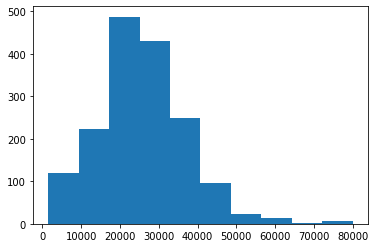

In [11]:
import matplotlib.pyplot as plt
plt.hist(df['salary'])
plt.show();

In [12]:
X = df.drop(['salary'], axis=1).values
y = df['salary'].values.reshape((-1, 1))
print(X.shape, y.shape)

(1650, 59) (1650, 1)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1155, 59) (1155, 1) (495, 59) (495, 1)


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5)
model.fit(X_train, y_train)

D:\Anaconda\anaconda\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

8622.987377935946


In [27]:
print(y_pred[:10])

[25297.50618265  6663.32391091 28277.21891716 33079.18172213
 15296.22154914 32275.89608055 35078.15056713 12793.41861457
 25296.7693544  14796.7485948 ]


In [28]:
print(y_test[:10].flatten())

[22500 10000 25000 40000 13500 25000 42500  3500 30000 20000]


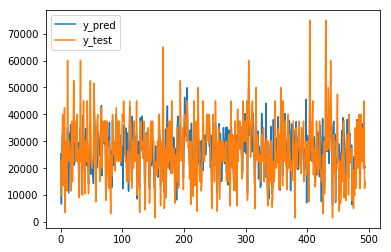

In [29]:
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['y_pred', 'y_test'])
plt.show();

In [30]:
# 目标变量对数化处理
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), test_size=0.3, random_state=42)
model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

D:\Installation\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.42803287201114965


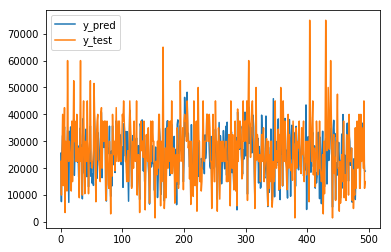

In [31]:
plt.plot(np.exp(y_pred))
plt.plot(np.exp(y_test))
plt.legend(['y_pred', 'y_test'])
plt.show();

### 8.招聘数据建模：XGBoost

In [53]:
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import time


kf = KFold(n_splits=5, random_state=123, shuffle=True)

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'mse', mean_squared_error(np.exp(preds), np.exp(labels))


y = np.log(y)
valid_preds = np.zeros((330, 5))

time_start = time.time()


for i, (train_ind, valid_ind) in enumerate(kf.split(X)):
    print('Fold', i+1, 'out of', 5)
    X_train, y_train = X[train_ind], y[train_ind]
    X_valid, y_valid = X[valid_ind], y[valid_ind]
    xgb_params = {
        'eta': 0.01, 
        'max_depth': 6, 
        'subsample': 0.9, 
        'colsample_bytree': 0.9, 
        'objective': 'reg:linear', 
        'eval_metric': 'rmse', 
        'seed': 99, 
        'silent': True
    }

    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)
    
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]
    model = xgb.train(
        xgb_params, 
        d_train, 
        2000,
        watchlist,
        verbose_eval=100,
#         feval=evalerror,
        early_stopping_rounds=1000
    )
#     valid_preds[:, i] = np.exp(model.predict(d_valid))

# valid_pred = valid_preds.means(axis=1)
# print('outline score：{}'.format(np.sqrt(mean_squared_error(y_pred, valid_pred)*0.5)))
print('cv training time {} seconds'.format(time.time() - time_start))

Fold 1 out of 5
[0]	train-rmse:0.33306	valid-rmse:0.331891
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 1000 rounds.
[100]	train-rmse:0.123801	valid-rmse:0.122953
[200]	train-rmse:0.048429	valid-rmse:0.047906
[300]	train-rmse:0.022679	valid-rmse:0.023399
[400]	train-rmse:0.015262	valid-rmse:0.017538
[500]	train-rmse:0.013248	valid-rmse:0.016514
[600]	train-rmse:0.012385	valid-rmse:0.016278
[700]	train-rmse:0.011668	valid-rmse:0.016141
[800]	train-rmse:0.011105	valid-rmse:0.016072
[900]	train-rmse:0.010508	valid-rmse:0.016045
[1000]	train-rmse:0.009946	valid-rmse:0.016034
[1100]	train-rmse:0.009444	valid-rmse:0.016018
[1200]	train-rmse:0.008941	valid-rmse:0.015965
[1300]	train-rmse:0.008467	valid-rmse:0.015955
[1400]	train-rmse:0.008074	valid-rmse:0.015952
[1500]	train-rmse:0.00766	valid-rmse:0.015982
[1600]	train-rmse:0.007329	valid-rmse:0.015999
[1700]	train-rmse:0.006996	valid-rmse:0.01601
[1800]

In [17]:
import xgboost as xgb
xg_train = xgb.DMatrix(X, y)

params = {
        'eta': 0.01, 
        'max_depth': 6, 
        'subsample': 0.9, 
        'colsample_bytree': 0.9, 
        'objective': 'reg:linear', 
        'eval_metric': 'rmse', 
        'seed': 99, 
        'silent': True
    }
cv = xgb.cv(params, xg_train, 1000, nfold=5, early_stopping_rounds=800, verbose_eval=100)

[0]	train-rmse:28429+141.917	test-rmse:28424.4+574.679
[100]	train-rmse:12968.3+98.1382	test-rmse:13274.2+603.656
[200]	train-rmse:8320.67+100.987	test-rmse:9208.95+630.048
[300]	train-rmse:6977.47+112.856	test-rmse:8383.93+603.818
[400]	train-rmse:6466.12+114.245	test-rmse:8207+577.643
[500]	train-rmse:6114.47+104.926	test-rmse:8144.4+564.825
[600]	train-rmse:5812.48+106.262	test-rmse:8126.04+554.251
[700]	train-rmse:5529.31+105.557	test-rmse:8107.05+541.601
[800]	train-rmse:5272.61+106.746	test-rmse:8102.44+543.919
[900]	train-rmse:5025.54+99.853	test-rmse:8097.94+539.045
[999]	train-rmse:4782.92+103.466	test-rmse:8107.05+528.965


### 9.招聘数据建模：lightGBM

In [50]:
X = df.drop(['salary'], axis=1).values
y = np.log(df['salary'].values.reshape((-1, 1))).ravel()
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [51]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'mse', mean_squared_error(np.exp(preds), np.exp(labels))

params = {
    'learning_rate': 0.01,
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'sub_feature': 0.7,
    'num_leaves': 17,
    'colsample_bytree': 0.7,
    'feature_fraction': 0.7,
    'min_data': 100,
    'min_hessian': 1,
    'verbose': -1,
}

print('begin cv 5-fold training...')
scores = []
start_time = time.time()

kf = KFold(n_splits=5, shuffle=True, random_state=27)
for i, (train_index, valid_index) in enumerate(kf.split(X)):
    print('Fold', i+1, 'out of', 5)
    X_train, y_train = X[train_index], y[train_index]
    X_valid, y_valid = X[valid_index], y[valid_index]
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_valid = lgb.Dataset(X_valid, y_valid)
    model = lgb.train(params,
                lgb_train,
                num_boost_round=2000,
                valid_sets=lgb_valid,
                verbose_eval=200,
#                feval=evalerror,
               early_stopping_rounds=1000)
#     feat_importance = pd.Series(model.feature_importance(), index=X.columns).sort_values(ascending=False)
#     test_preds[:, i] = model.predict(lgb_valid)
# print('outline score：{}'.format(np.sqrt(mean_squared_error(y_pred, valid_pred)*0.5)))
print('cv training time {} seconds'.format(time.time() - time_start))

begin cv 5-fold training...
Fold 1 out of 5
Training until validation scores don't improve for 1000 rounds.
[200]	valid_0's l2: 0.187053
[400]	valid_0's l2: 0.168876
[600]	valid_0's l2: 0.163493
[800]	valid_0's l2: 0.159567
[1000]	valid_0's l2: 0.156541
[1200]	valid_0's l2: 0.154333
[1400]	valid_0's l2: 0.152615
[1600]	valid_0's l2: 0.151386
[1800]	valid_0's l2: 0.150502
[2000]	valid_0's l2: 0.150052
Did not meet early stopping. Best iteration is:
[2000]	valid_0's l2: 0.150052
Fold 2 out of 5
Training until validation scores don't improve for 1000 rounds.
[200]	valid_0's l2: 0.215835
[400]	valid_0's l2: 0.193448
[600]	valid_0's l2: 0.183787
[800]	valid_0's l2: 0.17847
[1000]	valid_0's l2: 0.176257
[1200]	valid_0's l2: 0.17524
[1400]	valid_0's l2: 0.175028
[1600]	valid_0's l2: 0.17538
[1800]	valid_0's l2: 0.175021
[2000]	valid_0's l2: 0.174812
Did not meet early stopping. Best iteration is:
[1980]	valid_0's l2: 0.174742
Fold 3 out of 5
Training until validation scores don't improve for 